# Tests Boletines 1 y 2

## Ejercicio 1

In [166]:
import math
class Punto:
    
    def __init__(self, x,y,z):
        self.x = x
        self.y = y
        self.z = z
        
    def imprimirPunto(self):
        print "(x: " + str(self.x) + ", y: " + str(self.y) + ", z: " + str(self.z) + ")"

def distanciaEuclides(punto1, punto2):
    distancia = math.sqrt((punto2.x-punto1.x)**2+(punto2.y-punto1.y)**2+(punto2.z-punto1.z)**2)
    return distancia

puntoOrigen = Punto(0,0,0)
puntoOrigen.imprimirPunto()

(x: 0, y: 0, z: 0)


### Apartado a

In [167]:
puntos = []
puntos.append(Punto(0,3,2))
puntos.append(Punto(3,0,1))
puntos.append(Punto(0,3,-1))
puntos.append(Punto(3,0,-1))
puntos.append(Punto(1,2,1))
puntos.append(Punto(2,1,1))
for punto in puntos:
    print distanciaEuclides(puntoOrigen,punto)

3.60555127546
3.16227766017
3.16227766017
3.16227766017
2.44948974278
2.44948974278


### Apartado b 

Para K=1 la predicción sería del 50% de probabilidad de que el punto elegido sea Punto(1,2,1) y otro 50% de probabilidad de que el punto elegido sea Punto(2,1,1), ya que ambos puntos son los vecinos más próximos al punto de test Punto(0,0,0), ya que ambos se encuentran a la misma distancia euclídea.

### Apartado c 

Para K=3 la predicción sería el Punto(1,2,1) y Punto(2,1,1) de forma segura al ser los dos vecinos más próximos en distancia euclídea, y el tercer vecino más próximo sería con un 1/3 de probabilidad o bien Punto(3,0,1), o bien Punto(0,3,-1), o bien Punto(3,0,-1) ya que dichos 3 puntos serían los siguientes más próximos y están a la misma distancia euclídea los tres del punto de test Punto(0,0,0).

## Ejercicio 2

### Apartado a

- Cuatro variables de entrada numéricas -> Recency (months),Frequency (times), Monetary (c.c. blood), y Time (months)
- Una de salida booleana diciendo si sí o si no donó sangre en Marzo de 2007 -> "whether he/she donated blood in March 2007"
- Hay 748 instancias.
- Dos clases: Los que sí donaron en Marzo de 2007 y los que no. La distribución es 0 ó 1.
- Se eliminan como valores perdidos los NaN (Not a Number), ya que las variables tienen que contener números válidos.

In [243]:
from sklearn import preprocessing, cross_validation, neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Imputer
from sklearn.externals import joblib
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

datasetName = 'bloodTransfusion.data'
datasetDelimiter = ','

# load the CSV file as a numpy matrix
dataset = np.loadtxt(datasetName, delimiter=datasetDelimiter)
print dataset.shape
# separate the data from the target attributes
xRaw = dataset[:,0:dataset.shape[1]-1]
y = dataset[:,dataset.shape[1]-1]
print "xRaw, y", xRaw, y
print "mean, std", xRaw.mean(axis=0), xRaw.std(axis=0)
# missing values
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
xPrep = imp.fit_transform(xRaw)
print "Eliminate missing values: mean, std", xPrep.mean(axis=0), xPrep.std(axis=0)
#Standardize data
scaler = preprocessing.StandardScaler().fit(xPrep)
x=scaler.transform(xPrep)
print "Data after x standardizing", x
print "mean, std", scaler.mean_, scaler.scale_

(748, 5)
xRaw, y [[  2.00000000e+00   5.00000000e+01   1.25000000e+04   9.80000000e+01]
 [  0.00000000e+00   1.30000000e+01   3.25000000e+03   2.80000000e+01]
 [  1.00000000e+00   1.60000000e+01   4.00000000e+03   3.50000000e+01]
 ..., 
 [  2.30000000e+01   3.00000000e+00   7.50000000e+02   6.20000000e+01]
 [  3.90000000e+01   1.00000000e+00   2.50000000e+02   3.90000000e+01]
 [  7.20000000e+01   1.00000000e+00   2.50000000e+02   7.20000000e+01]] [ 1.  1.  1.  1.  0.  0.  1.  0.  1.  1.  0.  0.  1.  0.  1.  1.  1.  1.
  1.  1.  1.  0.  1.  1.  0.  0.  0.  1.  1.  0.  0.  1.  1.  1.  0.  1.
  1.  1.  1.  1.  1.  0.  1.  0.  1.  1.  0.  0.  0.  0.  0.  1.  0.  0.
  1.  1.  1.  1.  0.  0.  0.  1.  0.  1.  1.  0.  1.  0.  0.  0.  0.  0.
  1.  0.  1.  1.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  1.
  1.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  0.  0.  1.  0.  0.  1.  0.  0.  1.  1.  1.  1.  1.  0.  0.
  1.  0.  1.  1.  0.  0.  0.  0.  0.  

### Apartado b

En la página web de la documentación oficial de Scikit-Learn para esta clase http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html podemos ver

- Parámetros

n_neighbors : int, optional (default = 5)

    Number of neighbors to use by default for k_neighbors queries.

weights : str or callable, optional (default = ‘uniform’)

    weight function used in prediction. Possible values:

        ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
        ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
        [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.

algorithm : {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, optional

    Algorithm used to compute the nearest neighbors:

        ‘ball_tree’ will use BallTree
        ‘kd_tree’ will use KDTree
        ‘brute’ will use a brute-force search.
        ‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.

    Note: fitting on sparse input will override the setting of this parameter, using brute force.

leaf_size : int, optional (default = 30)

    Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.

metric : string or DistanceMetric object (default = ‘minkowski’)

    the distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric. See the documentation of the DistanceMetric class for a list of available metrics.

p : integer, optional (default = 2)

    Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

metric_params : dict, optional (default = None)

    Additional keyword arguments for the metric function.

n_jobs : int, optional (default = 1)

    The number of parallel jobs to run for neighbors search. If -1, then the number of jobs is set to the number of CPU cores. Doesn’t affect fit method.

- Métodos

    - fit(X, y) 	Fit the model using X as training data and y as target values
    - get_params([deep]) 	Get parameters for this estimator.
    - kneighbors([X, n_neighbors, return_distance]) 	Finds the K-neighbors of a point.
    - kneighbors_graph([X, n_neighbors, mode]) 	Computes the (weighted) graph of k-Neighbors for points in X
    - predict(X) 	Predict the class labels for the provided data
    - predict_proba(X) 	Return probability estimates for the test data X.
    - score(X, y[, sample_weight]) 	Returns the mean accuracy on the given test data and labels.
    - set_params(\*\*params) 	Set the parameters of this estimator.
    - __init__(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)


### Apartado c

In [244]:
#Divide in training and test, shuffling the examples and keeping the proportion of examples of each class
xTrain, xTest, yTrain, yTest = cross_validation.train_test_split(x, y, test_size=0.2, random_state=0)
print 'xTrain', xTrain, "\nxTest", xTest, "\nyTrain", yTrain, "\nyTest", yTest

xTrain [[-0.68067941  0.59726713  0.59726713  0.15262115]
 [-0.80428907 -0.08820401 -0.08820401 -0.91468418]
 [-0.92789873 -0.77367514 -0.77367514 -1.32518623]
 ..., 
 [-0.30985042  0.9400027   0.9400027   2.2461816 ]
 [-0.80428907  0.42589934  0.42589934  0.64522361]
 [ 0.80263654 -0.25957179 -0.25957179 -0.05262988]] 
xTest [[-0.68067941 -0.43093957 -0.43093957 -0.2578809 ]
 [-0.92789873  0.9400027   0.9400027   0.27577176]
 [-0.92789873  0.08316378  0.08316378 -0.79153356]
 [-0.68067941  0.76863491  0.76863491 -0.2578809 ]
 [-0.92789873  6.08103621  6.08103621  2.61563344]
 [-0.92789873 -0.60230736 -0.60230736 -1.24308582]
 [ 0.55541721 -0.77367514 -0.77367514 -0.83258377]
 [-0.92789873 -0.60230736 -0.60230736 -1.24308582]
 [ 1.66790417 -0.43093957 -0.43093957  0.23472156]
 [-0.68067941  1.11137048  1.11137048 -0.01157967]
 [ 0.18458823  0.08316378  0.08316378  0.27577176]
 [ 0.55541721 -0.25957179 -0.25957179  0.15262115]
 [-0.92789873 -0.77367514 -0.77367514 -1.32518623]
 [-0.6806

### Apartado d

The "one standard error rule" is applied when selecting models through cross-validation (or more generally through any randomization-based procedure).

Assume we consider models Mτ
indexed by a complexity parameter τ∈ℝ, such that Mτ is "more complex" than Mτ′ exactly when τ>τ′. Assume further that we assess the quality of a model M by some randomization process, e.g., cross-validation. Let q(M) denote the "average" quality of M

, e.g., the mean out-of-bag prediction error across many cross-validation runs. We wish to minimize this quantity.

However, since our quality measure comes from some randomization procedure, it comes with variability. Let s(M)
denote the standard error of the quality of M across the randomization runs, e.g., the standard deviation of the out-of-bag prediction error of M

over cross-validation runs.

Then we choose the model Mτ
, where τ is the smallest τ

such that

q(Mτ)≤q(Mτ′)+s(Mτ′),

where τ′
indexes the (on average) best model, q(Mτ′)=minτq(Mτ).

Best hyperparameters Cross-Validation {'n_neighbors': 29, 'weights': 'uniform'}
0.719 (+/-0.026) for {'n_neighbors': 1, 'weights': 'uniform'}
()
0.719 (+/-0.026) for {'n_neighbors': 1, 'weights': 'distance'}
()
0.768 (+/-0.021) for {'n_neighbors': 2, 'weights': 'uniform'}
()
0.729 (+/-0.034) for {'n_neighbors': 2, 'weights': 'distance'}
()
0.751 (+/-0.018) for {'n_neighbors': 3, 'weights': 'uniform'}
()
0.739 (+/-0.020) for {'n_neighbors': 3, 'weights': 'distance'}
()
0.771 (+/-0.031) for {'n_neighbors': 4, 'weights': 'uniform'}
()
0.746 (+/-0.028) for {'n_neighbors': 4, 'weights': 'distance'}
()
0.749 (+/-0.030) for {'n_neighbors': 5, 'weights': 'uniform'}
()
0.727 (+/-0.025) for {'n_neighbors': 5, 'weights': 'distance'}
()
0.773 (+/-0.022) for {'n_neighbors': 6, 'weights': 'uniform'}
()
0.756 (+/-0.032) for {'n_neighbors': 6, 'weights': 'distance'}
()
0.769 (+/-0.039) for {'n_neighbors': 7, 'weights': 'uniform'}
()
0.753 (+/-0.039) for {'n_neighbors': 7, 'weights': 'distance'}
()
0.7

/home/moises/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/home/moises/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/home/moises/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


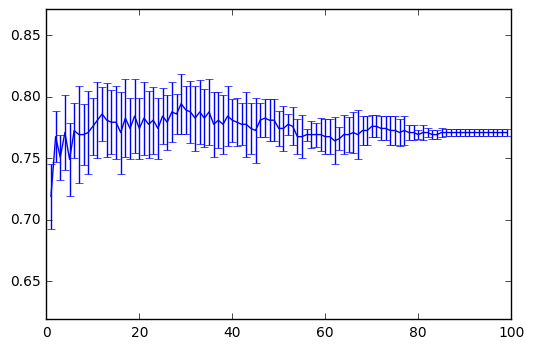

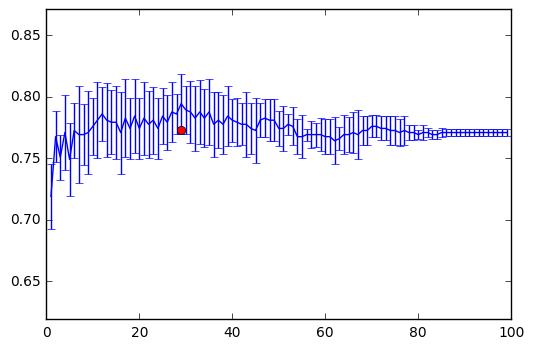

La estimacion de CV-5 era 0.770 y el resultado del test es 0.773


In [252]:
hyperParams = {'n_neighbors': range(1,100),
               'weights': ['uniform', 'distance']}

#Create an instance of Neighbors Classifier and fit the data for the grid parameters
modelCV = GridSearchCV(neighbors.KNeighborsClassifier(), 
                     hyperParams, cv=5, scoring='accuracy')
modelCV.fit(xTrain, yTrain)
print "Best hyperparameters Cross-Validation", modelCV.best_params_
neighList, errList, devList = [], [], []
i = 0
for hyperP, mean_score, scores in modelCV.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std(), hyperP))
    if hyperP['weights'] == modelCV.best_params_['weights']:
        neighList.append(hyperP['n_neighbors'])
        errList.append(mean_score)
        devList.append(scores.std())
    print()    

#Ahora comprobamos con los demás resultados entre los que se haya el vector de ranking (scikit-learn v0.18.1)

#print "Resultados:", modelCV.cv_results_
oserList = list(modelCV.cv_results_['rank_test_score'])
#Escogemos el que mejor ranking que normalmente será 1
regla_un_error_estandar = min(oserList)
#Nos quedamos con el primer índice que cumpla la regla
indice = [i for i,x in enumerate(oserList) if x == regla_un_error_estandar][0] 
vecinos = modelCV.grid_scores_[indice][0]['n_neighbors']
#print(vecinos)
peso = modelCV.grid_scores_[indice][0]['weights']
#print(peso)
print("Para los scores de test del CV %r el mejor ranking es %i y pertenece al pliegue cuyo n_vecinos es %i y su peso %s" 
      % (oserList, regla_un_error_estandar, vecinos, peso))
#Según la teoría vista en clase (transparencias 23 y 25 del tema 1) debería de escoger el pliegue que 
#cumpla con la regla 'one-standar-error-rule'. Scikit-Learn ya nos facilita un vector con el ranking de los
#mejores test scores.

#Aplicamos la regla para quedarnos el mínimo t (esa será nuestra estimación del error de test del CV)
estimacionCV = list(modelCV.cv_results_['mean_test_score'])[indice]-list(modelCV.cv_results_['std_test_score'])[indice]
print("%0.3f" % estimacionCV)

#De entre todos los pliegues de la validación cruzada, elige como mejores hiperparámetros el pliegue
#cuyo número de vecinos es 4 y su peso es uniforme con el score 0.771, y desviación estándar de +/- 0.031,
#el cual como hemos podido ver es el que mejor ranking de test scores tiene.
plt.errorbar(neighList, errList, yerr = devList)
plt.xlim(neighList[0]-1, neighList[len(neighList)-1]+1)
plt.ylim(errList[0]-0.1, errList[len(errList)-1]+0.1)
plt.show()



model = neighbors.KNeighborsClassifier(n_neighbors = modelCV.best_params_['n_neighbors'], 
                                       weights = modelCV.best_params_['weights'])
model.fit(xTrain, yTrain)
precision_media = model.score(xTest,yTest)

plt.errorbar(neighList, errList, yerr = devList)
plt.xlim(neighList[0]-1, neighList[len(neighList)-1]+1)
plt.ylim(errList[0]-0.1, errList[len(errList)-1]+0.1)
plt.plot(modelCV.best_params_['n_neighbors'], precision_media, 'ro')
plt.show()
print("La estimacion de CV-5 era %0.3f y el resultado del test es %0.3f" % (estimacionCV, precision_media))
#Podemos observar que la estimación de la Validación Cruzada de 5 pliegues ha sido realmente buena 
#ya que acierta de pleno, aparte de estar dentro del rango (0.740,0.802)


## Ejercicio 3

### Apartado a

('N. de vecinos ', 29, ' y N. de Variables ', 4)



[2017-06-08 05:00:31] Features: 1/4 -- score: 0.770917887816
[2017-06-08 05:00:31] Features: 1/4 -- score: 0.770917887816
[2017-06-08 05:00:32] Features: 1/4 -- score: 0.770917887816
[2017-06-08 05:00:32] Features: 2/4 -- score: 0.770917887816
[2017-06-08 05:00:32] Features: 3/4 -- score: 0.767528532074
[2017-06-08 05:00:32] Features: 4/4 -- score: 0.794266847235

0.771 (+/-0.003) para 1 variables seleccionadas en (0,)
0.771 (+/-0.003) para 2 variables seleccionadas en (1, 2)
0.768 (+/-0.012) para 3 variables seleccionadas en (1, 2, 3)
0.794 (+/-0.024) para 4 variables seleccionadas en (0, 1, 2, 3)


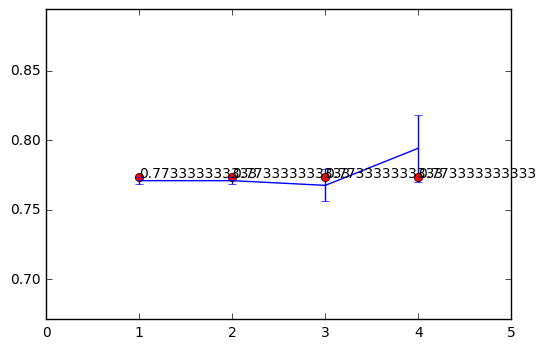

In [172]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#Tal y como nos pide el ejercicio escogemos el mejor parámetro de número de vecinos del ejercicio 2
vecinos = modelCV.best_params_['n_neighbors'] 
variables = 4
#Cuatro variables de entrada numéricas -> Recency (months),Frequency (times), Monetary (c.c. blood), y Time (months)
print("N. de vecinos ", vecinos, " y N. de Variables ", variables)

knn = neighbors.KNeighborsClassifier(n_neighbors=vecinos)

sfs1 = SFS(knn, 
           k_features=variables, 
           forward=True, 
           floating=True, 
           verbose=2,
           scoring='accuracy',
           cv=5)

sfs1 = sfs1.fit(xTrain, yTrain)
diccionario_metricas = sfs1.get_metric_dict(confidence_interval=0.95)
varList, errList, devList = [], [], []
for i in range(1,len(diccionario_metricas)+1):
    puntuacion_media = diccionario_metricas[i]['avg_score']
    desviacion_estandar = diccionario_metricas[i]['std_dev']
    num_variables_usadas = len(diccionario_metricas[i]['feature_idx'])
    print("%0.3f (+/-%0.03f) para %i variables seleccionadas en %r"
              % (puntuacion_media, desviacion_estandar, num_variables_usadas, diccionario_metricas[i]['feature_idx']))
    varList.append(num_variables_usadas)
    errList.append(puntuacion_media)
    devList.append(desviacion_estandar)
    #marcamos el error de test del ejercicio 2 en este paso (Así aprovechamos la misma figura de plot)
    plt.plot(num_variables_usadas, precision_media, 'ro')
    plt.text(num_variables_usadas, precision_media, str(precision_media))
#El paso que cumple la regla 'one-standar-error-rule' es el de 4 variables, porque coincide con lo visto en el
#ejercicio anterior al respecto.
plt.errorbar(varList, errList, yerr = devList)
plt.xlim(varList[0]-1, varList[len(varList)-1]+1)
plt.ylim(errList[0]-0.1, errList[len(errList)-1]+0.1)
plt.show()
#Podemos observar que efectivamente para 4 variables seleccionadas, tanto la estimación como la desviación estándar 
#son exctamente las mismas que en la Validación Cruzada de 5 pliegues del ejercicio anterior que nos daba como
#mejor pliegue el de 4 Vecinos y peso Uniforme del ejercicio y que finalmente fue elegida como la mejor estimación 
#del error. Es decir, score 0.771 y desviación +/- 0.031 que con la regla del mínimo t sería 0.740.

#NOTA: Al poner como marcadores la estimación del error del test hecho en el ejercicio anterior no hace falta 
#'plottear' de nuevo una nueva figura, en la misma figura se puede hacer la comparativa. Podemos ver que el punto
#está exactamente en el 0.740 estimado.


### Apartado b


[2017-06-08 06:53:58] Features: 1/4 -- score: 0.770917887816
[2017-06-08 06:53:58] Features: 2/4 -- score: 0.759195661736
[2017-06-08 06:53:58] Features: 3/4 -- score: 0.777585480473
[2017-06-08 06:53:58] Features: 4/4 -- score: 0.794266847235

('La ultima clave es ', 4, ' y ?hay solo un paso? ', False)
0.794 (+/-0.024) para 4 variables seleccionadas en (0, 1, 2, 3)
0.778 (+/-0.024) para 3 variables seleccionadas en (0, 1, 3)
0.759 (+/-0.029) para 2 variables seleccionadas en (0, 3)
0.771 (+/-0.003) para 1 variables seleccionadas en (0,)


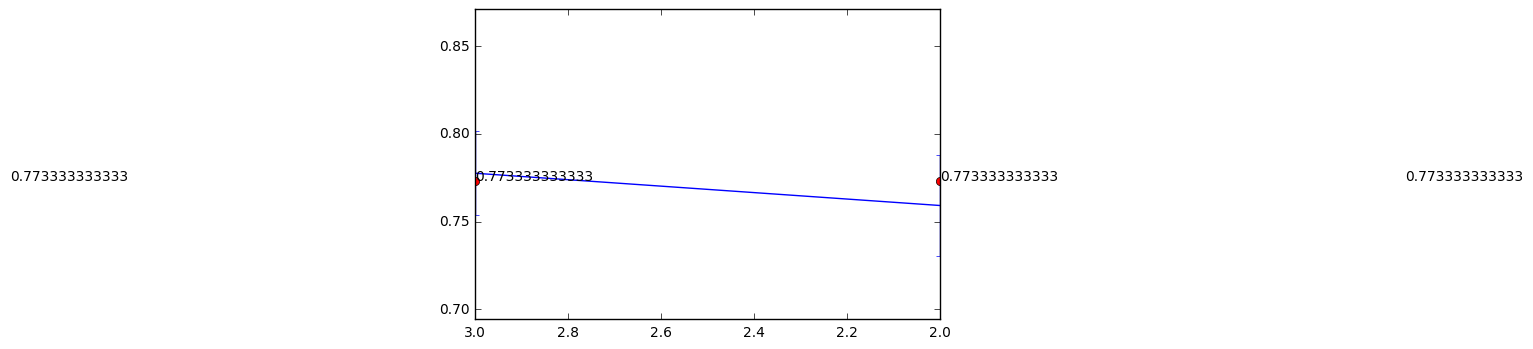

In [259]:
from mlxtend.feature_selection import SequentialFeatureSelector as SBS

sbs = SBS(knn, 
           k_features=variables, 
           forward=True,   
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=5)

sbs = sbs.fit(xTrain, yTrain)
diccionario_metricas = sbs.get_metric_dict(confidence_interval=0.95)

claves = diccionario_metricas.keys()
un_solo_paso = False
if(len(claves)==1):
    ultima_clave = claves[0]
    un_solo_paso = True
else:
    ultima_clave = claves[len(claves)-1]
print("La ultima clave es ", ultima_clave, " y ?hay solo un paso? ", un_solo_paso)

varList, errList, devList = [], [], []
#Ahora vamos hacia atrás, pero como ya sabemos de antemano que ya se va a quedar con el de 4 variables como la 
#mejor estimación, el algoritmo ya se paró en el primer paso, por lo que sólo tenemos un paso y con el fin 
#de evitar el error 'KeyError' se hace un control de excepciones
for i in range(ultima_clave,0,-1):
    try:
        puntuacion_media = diccionario_metricas[i]['avg_score']
        desviacion_estandar = diccionario_metricas[i]['std_dev']
        num_variables_usadas = len(diccionario_metricas[i]['feature_idx'])
        print("%0.3f (+/-%0.03f) para %i variables seleccionadas en %r"
                  % (puntuacion_media, desviacion_estandar, num_variables_usadas, diccionario_metricas[i]['feature_idx']))
        varList.append(num_variables_usadas)
        errList.append(puntuacion_media)
        devList.append(desviacion_estandar)
        #marcamos el error de test del ejercicio 2 en este paso (Así aprovechamos la misma figura de plot)
        plt.plot(num_variables_usadas, precision_media, 'ro')
        plt.text(num_variables_usadas, precision_media, str(precision_media))
    except KeyError:
        print("No hay paso ", i, " en la seleccion hacia atras porque el algoritmo de seleccion ya habia parado.")
plt.errorbar(varList, errList, yerr = devList)
plt.xlim(varList[0]-1, varList[len(varList)-1]+1)
plt.ylim(errList[0]-0.1, errList[len(errList)-1]+0.1)
plt.show()
#Lo primero que podemos apreciar es que efectivamente el algoritmo de selección hacia atrás ya toma como mejor
#estimación la de 4 variables, para y ya no sigue, porque no tiene sentido de que lo haga, ya que tanto la 
#estimación como la desviación estándar son exctamente las mismas que las del Apartado a) de este ejercicio
#y, además, las mimas que en la Validación Cruzada de 5 pliegues del ejercicio anterior que nos daba como
#mejor pliegue el de 4 Vecinos y peso Uniforme, y que finalmente fue elegida como la mejor estimación 
#del error con t mínimo de 0.740. Es decir, score 0.771 y desviación +/- 0.031. Y cómo ya sabíamos que 
#éste era el modelo seleccionado porque era el que cumplía con la regla 'one-standard-error-rule', 
#podemos concluir que la estimación nuevamente ha sido muy buena, ya que acierta.

#Cabe reseñar que al ir hacia atrás sólo ha habido un paso. Como ya sabemos scikit-learn internamente hace un
#rank para cada combinación, si el rank que tiene ésta ya es 1, es que ya el mejor rank de todos, de modo que
#ya no hace falta que siga ejecutándose el algoritmo de selección.

#NOTA: Al poner como marcador la estimción del error del test hecho en el ejercicio anterior no hace falta 
#'plottear' de nuevo una nueva figura, en la misma figura se puede hacer la comparativa.

## Ejercicio 4

### Apartado a

- Ocho variables de entrada numéricas -> X1,X2,X3,X4,X5,X6,X7,X8
- Una de salida de valor real -> Y2
- Hay 768 instancias.
- No hay clases ya que es un problema de regresión y NO de clasificación.
- Se eliminan como valores perdidos los NaN (Not a Number), ya que las variables tienen que contener números válidos.

In [233]:
from sklearn import preprocessing, cross_validation, neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Imputer
from sklearn.externals import joblib
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

datasetName = 'EnergyEfficiency.data'
datasetDelimiter = ','

# load the CSV file as a numpy matrix
dataset = np.loadtxt(datasetName, delimiter=datasetDelimiter, skiprows=1) #Nos saltamos la cabecera
print dataset.shape
# separate the data from the target attributes
xRaw = dataset[:,0:dataset.shape[1]-1]
y = dataset[:,dataset.shape[1]-1]
print "xRaw, y", xRaw, y
print "mean, std", xRaw.mean(axis=0), xRaw.std(axis=0)
# missing values
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
xPrep = imp.fit_transform(xRaw)
print "Eliminate missing values: mean, std", xPrep.mean(axis=0), xPrep.std(axis=0)
#Standardize data
scaler = preprocessing.StandardScaler().fit(xPrep)
x=scaler.transform(xPrep)
print "Data after x standardizing", x
print "mean, std", scaler.mean_, scaler.scale_

(768, 9)
xRaw, y [[  9.80000000e-01   5.14500000e+02   2.94000000e+02 ...,   2.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  9.80000000e-01   5.14500000e+02   2.94000000e+02 ...,   3.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  9.80000000e-01   5.14500000e+02   2.94000000e+02 ...,   4.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  6.20000000e-01   8.08500000e+02   3.67500000e+02 ...,   3.00000000e+00
    4.00000000e-01   5.00000000e+00]
 [  6.20000000e-01   8.08500000e+02   3.67500000e+02 ...,   4.00000000e+00
    4.00000000e-01   5.00000000e+00]
 [  6.20000000e-01   8.08500000e+02   3.67500000e+02 ...,   5.00000000e+00
    4.00000000e-01   5.00000000e+00]] [ 21.33  21.33  21.33  21.33  28.28  25.38  25.16  29.6   27.3   21.97
  23.49  27.87  23.77  21.46  21.16  24.93  37.73  31.27  30.93  39.44
  29.79  29.68  29.79  29.4   10.9   11.19  10.94  11.17  11.27  11.72
  11.29  11.67  11.74  12.05  11.73  11.93  12.4   12.23  12.4   12.14
  16.78  16.8   16.

### Apartado b

En la página web de la documentación oficial de Scikit-Learn para esta clase http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html podemos ver

- Parámetros

n_neighbors : int, optional (default = 5)

    Number of neighbors to use by default for k_neighbors queries.

weights : str or callable

    weight function used in prediction. Possible values:

        ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
        ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
        [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.

    Uniform weights are used by default.

algorithm : {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, optional

    Algorithm used to compute the nearest neighbors:

        ‘ball_tree’ will use BallTree
        ‘kd_tree’ will use KDtree
        ‘brute’ will use a brute-force search.
        ‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.

    Note: fitting on sparse input will override the setting of this parameter, using brute force.

leaf_size : int, optional (default = 30)

    Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.

metric : string or DistanceMetric object (default=’minkowski’)

    the distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric. See the documentation of the DistanceMetric class for a list of available metrics.

p : integer, optional (default = 2)

    Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

metric_params : dict, optional (default = None)

    Additional keyword arguments for the metric function.

n_jobs : int, optional (default = 1)

    The number of parallel jobs to run for neighbors search. If -1, then the number of jobs is set to the number of CPU cores. Doesn’t affect fit method.


- Métodos

    - fit(X, y) 	Fit the model using X as training data and y as target values
    - get_params([deep]) 	Get parameters for this estimator.
    - kneighbors([X, n_neighbors, return_distance]) 	Finds the K-neighbors of a point.
    - kneighbors_graph([X, n_neighbors, mode]) 	Computes the (weighted) graph of k-Neighbors for points in X
    - predict(X) 	Predict the target for the provided data
    - score(X, y[, sample_weight]) 	Returns the coefficient of determination R^2 of the prediction.
    - set_params(\*\*params) 	Set the parameters of this estimator.


### Apartado c

In [234]:
#Divide in training and test, shuffling the examples and keeping the proportion of examples of each class
xTrain, xTest, yTrain, yTest = cross_validation.train_test_split(x, y, test_size=0.2, random_state=0)
print 'xTrain', xTrain, "\nxTest", xTest, "\nyTrain", yTrain, "\nyTest", yTest

xTrain [[-0.22861593  0.16235226 -1.68585446 ...,  1.34164079  1.2440492
  -0.5242106 ]
 [-0.03941654 -0.1159659   2.24780595 ...,  0.4472136  -1.00932293
  -0.5242106 ]
 [ 1.28497917 -1.22923856  0.         ...,  1.34164079 -1.00932293
   1.41133622]
 ..., 
 [ 1.28497917 -1.22923856  0.         ..., -0.4472136   1.2440492
   0.12097168]
 [-0.51241501  0.44067043 -1.12390297 ...,  1.34164079  1.2440492
  -1.16939287]
 [ 0.52818162 -0.67260223  0.         ..., -1.34164079  1.2440492
   0.76615395]] 
xTest [[-0.98541347  0.99730676  0.         ..., -0.4472136   1.2440492
   0.12097168]
 [-0.22861593  0.16235226 -1.68585446 ...,  0.4472136  -1.00932293
  -0.5242106 ]
 [ 0.24438254 -0.39428407  0.56195149 ..., -0.4472136  -1.00932293
  -0.5242106 ]
 ..., 
 [-0.98541347  0.99730676  0.         ...,  0.4472136  -1.00932293
   0.76615395]
 [-1.36381225  1.55394308  1.12390297 ...,  1.34164079  0.11736313
   1.41133622]
 [-1.36381225  1.55394308  1.12390297 ..., -1.34164079  0.11736313
  -0.52

### Apartado d

Best hyperparameters Cross-Validation {'n_neighbors': 3, 'weights': 'uniform'}
0.8992 (+/-0.0352) for {'n_neighbors': 1, 'weights': 'uniform'}
()
0.8992 (+/-0.0352) for {'n_neighbors': 1, 'weights': 'distance'}
()
0.9171 (+/-0.0134) for {'n_neighbors': 2, 'weights': 'uniform'}
()
0.9171 (+/-0.0138) for {'n_neighbors': 2, 'weights': 'distance'}
()
0.9227 (+/-0.0114) for {'n_neighbors': 3, 'weights': 'uniform'}
()
0.9225 (+/-0.0121) for {'n_neighbors': 3, 'weights': 'distance'}
()
0.9184 (+/-0.0119) for {'n_neighbors': 4, 'weights': 'uniform'}
()
0.9198 (+/-0.0126) for {'n_neighbors': 4, 'weights': 'distance'}
()
0.9153 (+/-0.0138) for {'n_neighbors': 5, 'weights': 'uniform'}
()
0.9178 (+/-0.0130) for {'n_neighbors': 5, 'weights': 'distance'}
()
0.9144 (+/-0.0139) for {'n_neighbors': 6, 'weights': 'uniform'}
()
0.9172 (+/-0.0134) for {'n_neighbors': 6, 'weights': 'distance'}
()
0.9159 (+/-0.0140) for {'n_neighbors': 7, 'weights': 'uniform'}
()
0.9183 (+/-0.0133) for {'n_neighbors': 7, 'w

/home/moises/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/home/moises/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/home/moises/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


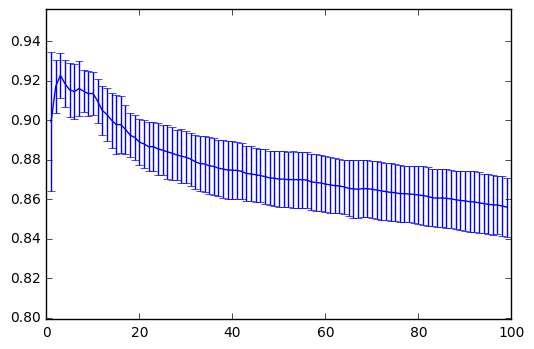

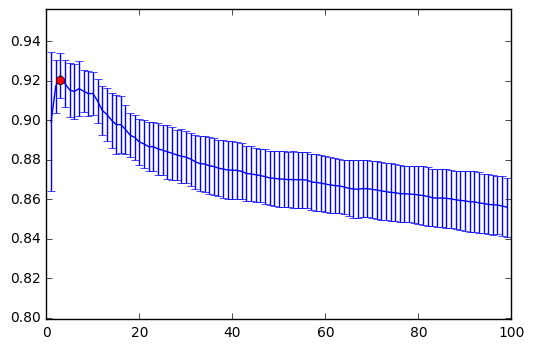

La estimacion de CV-5 era 0.9112 y el resultado del test es 0.9205


In [235]:
#NOTA IMPORTANTE: Le quito el redondeo a tres decimales y se lo dejo a 4 porque para este problema tenemos que ser 
#algo más precisos ya que la estimación que me da está en el mismo o muy cerca de uno de los puntos frontera

hyperParams = {'n_neighbors': range(1,100),
               'weights': ['uniform', 'distance']}

#Create an instance of Neighbors Reggresor and fit the data for the grid parameters
modelCV = GridSearchCV(neighbors.KNeighborsRegressor(), 
                     hyperParams, cv=5, scoring=None)
modelCV.fit(xTrain, yTrain)
print "Best hyperparameters Cross-Validation", modelCV.best_params_
neighList, errList, devList = [], [], []
i = 0
estimacionCV1 = float("inf")
for hyperP, mean_score, scores in modelCV.grid_scores_:
    print("%0.4f (+/-%0.4f) for %r"
              % (mean_score, scores.std(), hyperP))
    if hyperP['weights'] == modelCV.best_params_['weights']:
        neighList.append(hyperP['n_neighbors'])
        errList.append(mean_score)
        devList.append(scores.std())
        if hyperP['n_neighbors'] == modelCV.best_params_['n_neighbors']:
                estimacionCV1 = mean_score - scores.std()
    print()    
print("%0.4f" % estimacionCV1)

#Ahora comprobamos con los demás resultados entre los que se haya el vector de ranking (scikit-learn v0.18.1)

#print "Resultados:", modelCV.cv_results_
oserList = list(modelCV.cv_results_['rank_test_score'])
#Escogemos el que mejor ranking que normalmente será 1
regla_un_error_estandar = min(oserList)
#Nos quedamos con el primer índice que cumpla la regla
indice = [i for i,x in enumerate(oserList) if x == regla_un_error_estandar][0] 
vecinos = modelCV.grid_scores_[indice][0]['n_neighbors']
#print(vecinos)
peso = modelCV.grid_scores_[indice][0]['weights']
#print(peso)
print("Para los scores de test del CV %r el mejor ranking es %i y pertenece al pliegue cuyo n_vecinos es %i y su peso %s" 
      % (oserList, regla_un_error_estandar, vecinos, peso))
#Según la teoría vista en clase (transparencias 23 y 25 del tema 1) debería de escoger el pliegue que 
#cumpla con la regla 'one-standar-error-rule'. Scikit-Learn ya nos facilita un vector con el ranking de los
#mejores test scores.

#Aplicamos la regla para quedarnos el mínimo t (esa será nuestra estimación del error de test del CV)
print(list(modelCV.cv_results_['std_test_score']))
estimacionCV2 = list(modelCV.cv_results_['mean_test_score'])[indice]-list(modelCV.cv_results_['std_test_score'])[indice]
print("%0.4f" % estimacionCV2)

#Por diferencias que desconozco entre los grid_scrores_ y los cv_results_ para este problema en concreto no coinciden
#como las listas de datos para los plots se toman de los grid_scores por coherencia me quedaré con la estimación de éste.
estimacionCV = estimacionCV1

#De entre todos los pliegues de la validación cruzada, elige como mejores hiperparámetros el pliegue
#cuyo número de vecinos es 3 y su peso es uniforme con el score 0.9227, y desviación estándar de +/- 0.0114,
#el cual como hemos podido ver es el que mejor ranking de test scores tiene.
plt.errorbar(neighList, errList, yerr = devList)
plt.xlim(neighList[0]-1, neighList[len(neighList)-1]+1)
plt.ylim(errList[0]-0.1, errList[len(errList)-1]+0.1)
plt.show()



model = neighbors.KNeighborsRegressor(n_neighbors = modelCV.best_params_['n_neighbors'], 
                                       weights = modelCV.best_params_['weights'])
model.fit(xTrain, yTrain)
precision_media = model.score(xTest,yTest)

plt.errorbar(neighList, errList, yerr = devList)
plt.xlim(neighList[0]-1, neighList[len(neighList)-1]+1)
plt.ylim(errList[0]-0.1, errList[len(errList)-1]+0.1)
plt.plot(modelCV.best_params_['n_neighbors'], precision_media, 'ro')
plt.show()
print("La estimacion de CV-5 era %0.4f y el resultado del test es %0.4f" % (estimacionCV, precision_media))
#Podemos observar que la estimación de la Validación Cruzada de 5 pliegues ha sido bastante buena ya que se aproxima 
#mucho, estimaciónCV1 estimaba 0.9112 y estimaciónCV2 estimaba 0.9113, y al final ha sido 0.9205, 
#si tomamos la estimaciónCV2  está dentro del rango (0.9113,0.9341) si tomamos la estimaciónCV1 no por muy poco,
#esto último puede deberse a temas de redondeos pero de un modo u otro o está justo en el punto frontera o
#muy cerca de él.

In [225]:
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def calcular_bias_medio(xTest, yTest, prediccion):
    bias = (f(xTest) - np.mean(yTest-prediccion)) ** 2
    return np.mean(bias)

# Test

## Pregunta 1

Dado el problema de problema de regresión Energy Efficiency con la variable de salida cooling load, ¿cuál es el mínimo error de test?

In [242]:
from sklearn.metrics import mean_squared_error
prediccion = model.predict(xTest)
prediccion = np.round(prediccion, decimals= 2)
print(prediccion)
print(yTest)
MSE = mean_squared_error(yTest, prediccion)
#mse = np.mean((yTest-prediccion)**2)
bias_medio = calcular_bias_medio(xTest, yTest, prediccion)
print(bias_medio)
print(MSE-(bias_medio/2)) 
#Como MSE es el error medio y el bias_medio es la desviación total partimos por 2 (mitad de la desviación arriba, 
#la otra mitad hacia abajo). Por tanto el mínimo es 7.05 que si redondeamos nos quedamos con 7

[ 18.81  13.64  33.84  23.67  33.05  30.31  29.66  36.58  31.79  28.84
  11.65  35.63  16.18  37.06  41.39  28.41  14.27  30.3   16.44  15.3
  15.79  33.01  13.93  39.07  11.9   17.15  14.11  16.27  14.18  33.15
  15.84  17.36  38.78  17.51  29.57  36.89  16.38  36.01  20.54  13.76
  16.2   37.34  17.55  29.6   24.67  25.73  14.28  16.13  32.76  34.51
  33.28  15.93  34.29  17.43  36.74  13.83  25.    35.83  33.21  16.92
  19.42  15.06  33.73  13.64  15.53  14.77  40.04  14.34  30.3   36.42
  33.09  14.33  30.56  18.6   16.13  38.26  33.18  33.59  31.94  16.74
  37.05  30.63  16.26  16.62  38.14  28.03  26.11  35.05  15.86  22.    16.96
  28.84  15.19  26.02  40.24  18.76  32.97  16.54  13.67  36.92  33.48
  34.08  25.    32.59  13.65  31.58  32.15  17.41  15.31  24.26  19.59
  33.91  30.25  15.67  15.24  16.08  14.65  34.77  29.03  39.94  37.55
  14.98  15.23  35.04  15.19  39.04  16.91  30.02  14.8   30.89  32.44
  25.9   35.39  15.02  36.76  13.75  33.45  24.3   33.84  16.14  17.46


## Pregunta 2

Dado el problema de clasificación Blood Transfusion Service Center, ¿cuál es el valor del hiper-parámetro número de vecinos que produce el mínimo error de entrenamiento con validación cruzada (5-CV)?

In [171]:
hyperParams = {'n_neighbors': range(1,100),
               'weights': ['uniform', 'distance']}

#Create an instance of Neighbors Classifier and fit the data for the grid parameters
modelCV = GridSearchCV(neighbors.KNeighborsClassifier(), 
                     hyperParams, cv=5, scoring='accuracy')
modelCV.fit(xTrain, yTrain)
print "Best hyperparameters Cross-Validation", modelCV.best_params_

Best hyperparameters Cross-Validation {'n_neighbors': 29, 'weights': 'uniform'}


## Pregunta 3

Dado el problema de clasificación Blood Transfusion Service Center, si se utiliza como método de selección de variables forward stepwise selection, ¿en qué orden se van añadiendo las variables?

Formato de la respuesta (si las variables se añaden en el orden 0, 1, 3, 2): 0 1 3 2 

In [173]:
print(diccionario_metricas) #0 2 3 1

{1: {'std_err': 0.001376128970911626, 'avg_score': 0.77091788781628356, 'std_dev': 0.0027522579418232519, 'ci_bound': 0.0035374521374647587, 'feature_idx': (0,), 'cv_scores': array([ 0.76859504,  0.76666667,  0.77310924,  0.77310924,  0.77310924])}, 2: {'std_err': 0.001376128970911626, 'avg_score': 0.77091788781628356, 'std_dev': 0.0027522579418232519, 'ci_bound': 0.0035374521374647587, 'feature_idx': (1, 2), 'cv_scores': array([ 0.76859504,  0.76666667,  0.77310924,  0.77310924,  0.77310924])}, 3: {'std_err': 0.0058109944919597818, 'avg_score': 0.76752853207398664, 'std_dev': 0.011621988983919565, 'ci_bound': 0.014937636893700111, 'feature_idx': (1, 2, 3), 'cv_scores': array([ 0.76859504,  0.78333333,  0.77310924,  0.74789916,  0.76470588])}, 4: {'std_err': 0.012131447963495893, 'avg_score': 0.7942668472347616, 'std_dev': 0.024262895926991785, 'ci_bound': 0.031184879786799412, 'feature_idx': (0, 1, 2, 3), 'cv_scores': array([ 0.82644628,  0.75833333,  0.78991597,  0.78151261,  0.81512

## Pregunta 4

Dado el problema de clasificación Blood Transfusion Service Center, ¿cuál es el mínimo error de test?

In [251]:
from sklearn.metrics import mean_squared_error
prediccion = model.predict(xTest)
prediccion = np.round(prediccion, decimals= 2)
print(prediccion)
print(yTest)
MSE = mean_squared_error(yTest, prediccion)
#mse = np.mean((yTest-prediccion)**2)
print(MSE) #Al ser un problema de clasificación nos quedamos sólo con el MSE

[ 0.  0.  1.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.
  0.  0.  0.  1.  0.  1.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.]
[ 0.  1.  1.  1.  1.  0.  0.  1.  0.  1.  0.  0.  0.  1.  1.  0.  0.  0.
  0.  1.  0.  0.  1.  0.  0.  0.  0.  1.  0.  1.  1.  0.  0.  1.  0.  1.
  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.
  1.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  1.  0.  0.  1.  0.  0.
  0.  0.  0.  0.  1.  1. 

## Pregunta 5

<div align="center">

<table cellspacing="0" cellpadding="0" border="1">
 <tbody><tr>
  <td valign="top">
  <p><span lang="ES">Observación</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">X<sub>1</sub></span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">X<sub>2</sub></span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">X<sub>3</sub></span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">Y</span></p>
  </td>
 </tr>
 <tr>
  <td valign="top">
  <p><span lang="ES">1</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">0</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">3</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">2</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">1</span></p>
  </td>
 </tr>
 <tr>
  <td valign="top">
  <p><span lang="ES">2</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">3</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">0</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">1</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">0</span></p>
  </td>
 </tr>
 <tr>
  <td valign="top">
  <p><span lang="ES">3</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">0</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">3</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">-1</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">0</span></p>
  </td>
 </tr>
 <tr>
  <td valign="top">
  <p><span lang="ES">4</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">3</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">0</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">-1</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">1</span></p>
  </td>
 </tr>
 <tr>
  <td valign="top">
  <p><span lang="ES">5</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">1</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">2</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">1</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">1</span></p>
  </td>
 </tr>
 <tr>
  <td valign="top">
  <p><span lang="ES">6</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">2</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">1</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">1</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">0</span></p>
  </td>
 </tr>
</tbody></table>

</div>

In [175]:
puntos = []
puntos.append(Punto(0,3,2))
puntos.append(Punto(3,0,1))
puntos.append(Punto(0,3,-1))
puntos.append(Punto(3,0,-1))
puntos.append(Punto(1,2,1))
puntos.append(Punto(2,1,1))
for punto in puntos:
    print distanciaEuclides(puntoOrigen,punto)

3.60555127546
3.16227766017
3.16227766017
3.16227766017
2.44948974278
2.44948974278


## Pregunta 6

In [180]:
#NOTA IMPORTANTE: Le quito el redondeo a tres decimales y se lo dejo a 4 porque para este problema tenemos que ser 
#algo más precisos ya que la estimación que me da está en el mismo o muy cerca de uno de los puntos frontera

hyperParams = {'n_neighbors': range(1,100),
               'weights': ['uniform', 'distance']}

#Create an instance of Neighbors Reggresor and fit the data for the grid parameters
modelCV = GridSearchCV(neighbors.KNeighborsRegressor(), 
                     hyperParams, cv=5, scoring=None)
modelCV.fit(xTrain, yTrain)
print "Best hyperparameters Cross-Validation", modelCV.best_params_

Best hyperparameters Cross-Validation {'n_neighbors': 3, 'weights': 'uniform'}


## Pregunta 7

## Pregunta 8

In [260]:
print(diccionario_metricas) #1 3 0 2

{1: {'std_err': 0.001376128970911626, 'avg_score': 0.77091788781628356, 'std_dev': 0.0027522579418232519, 'ci_bound': 0.0035374521374647587, 'feature_idx': (0,), 'cv_scores': array([ 0.76859504,  0.76666667,  0.77310924,  0.77310924,  0.77310924])}, 2: {'std_err': 0.01428022783780499, 'avg_score': 0.75919566173576869, 'std_dev': 0.028560455675609983, 'ci_bound': 0.036708494302581683, 'feature_idx': (0, 3), 'cv_scores': array([ 0.78512397,  0.70833333,  0.74789916,  0.78151261,  0.77310924])}, 3: {'std_err': 0.011961628886842551, 'avg_score': 0.77758548047318088, 'std_dev': 0.023923257773685105, 'ci_bound': 0.030748345952843648, 'feature_idx': (0, 1, 3), 'cv_scores': array([ 0.80165289,  0.73333333,  0.77310924,  0.78991597,  0.78991597])}, 4: {'std_err': 0.012131447963495893, 'avg_score': 0.7942668472347616, 'std_dev': 0.024262895926991785, 'ci_bound': 0.031184879786799412, 'feature_idx': (0, 1, 2, 3), 'cv_scores': array([ 0.82644628,  0.75833333,  0.78991597,  0.78151261,  0.81512605]

## Pregunta 9

<div align="center">

<table cellspacing="0" cellpadding="0" border="1">
 <tbody><tr>
  <td valign="top">
  <p><span lang="ES">Observación</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">X<sub>1</sub></span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">X<sub>2</sub></span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">X<sub>3</sub></span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">Y</span></p>
  </td>
 </tr>
 <tr>
  <td valign="top">
  <p><span lang="ES">1</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">0</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">3</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">2</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">1</span></p>
  </td>
 </tr>
 <tr>
  <td valign="top">
  <p><span lang="ES">2</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">3</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">0</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">1</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">0</span></p>
  </td>
 </tr>
 <tr>
  <td valign="top">
  <p><span lang="ES">3</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">0</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">3</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">-1</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">0</span></p>
  </td>
 </tr>
 <tr>
  <td valign="top">
  <p><span lang="ES">4</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">3</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">0</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">-1</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">1</span></p>
  </td>
 </tr>
 <tr>
  <td valign="top">
  <p><span lang="ES">5</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">1</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">2</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">1</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">1</span></p>
  </td>
 </tr>
 <tr>
  <td valign="top">
  <p><span lang="ES">6</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">2</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">1</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">1</span></p>
  </td>
  <td valign="top">
  <p align="center"><span lang="ES">0</span></p>
  </td>
 </tr>
</tbody></table>

</div>

In [176]:
puntos = []
puntos.append(Punto(0,3,2))
puntos.append(Punto(3,0,1))
puntos.append(Punto(0,3,-1))
puntos.append(Punto(3,0,-1))
puntos.append(Punto(1,2,1))
puntos.append(Punto(2,1,1))
for punto in puntos:
    print distanciaEuclides(puntoOrigen,punto)

3.60555127546
3.16227766017
3.16227766017
3.16227766017
2.44948974278
2.44948974278


## Pregunta 10